# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_csv')
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


# data pre processing

In [3]:
#checking the shape of data
df.shape

(209593, 37)

In [4]:
#checking the types of data
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [5]:
#checking the columns in data
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
#checking the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
#checking the null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

there is no null values in the dataset

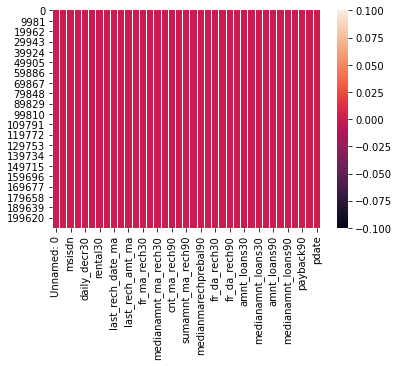

In [8]:
#usning heatmap for better representation of the null values
sns.heatmap(df.isnull())


In [9]:
#describing the data
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
#checking the correlation between columns
dfcor=df.corr()
dfcor


,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


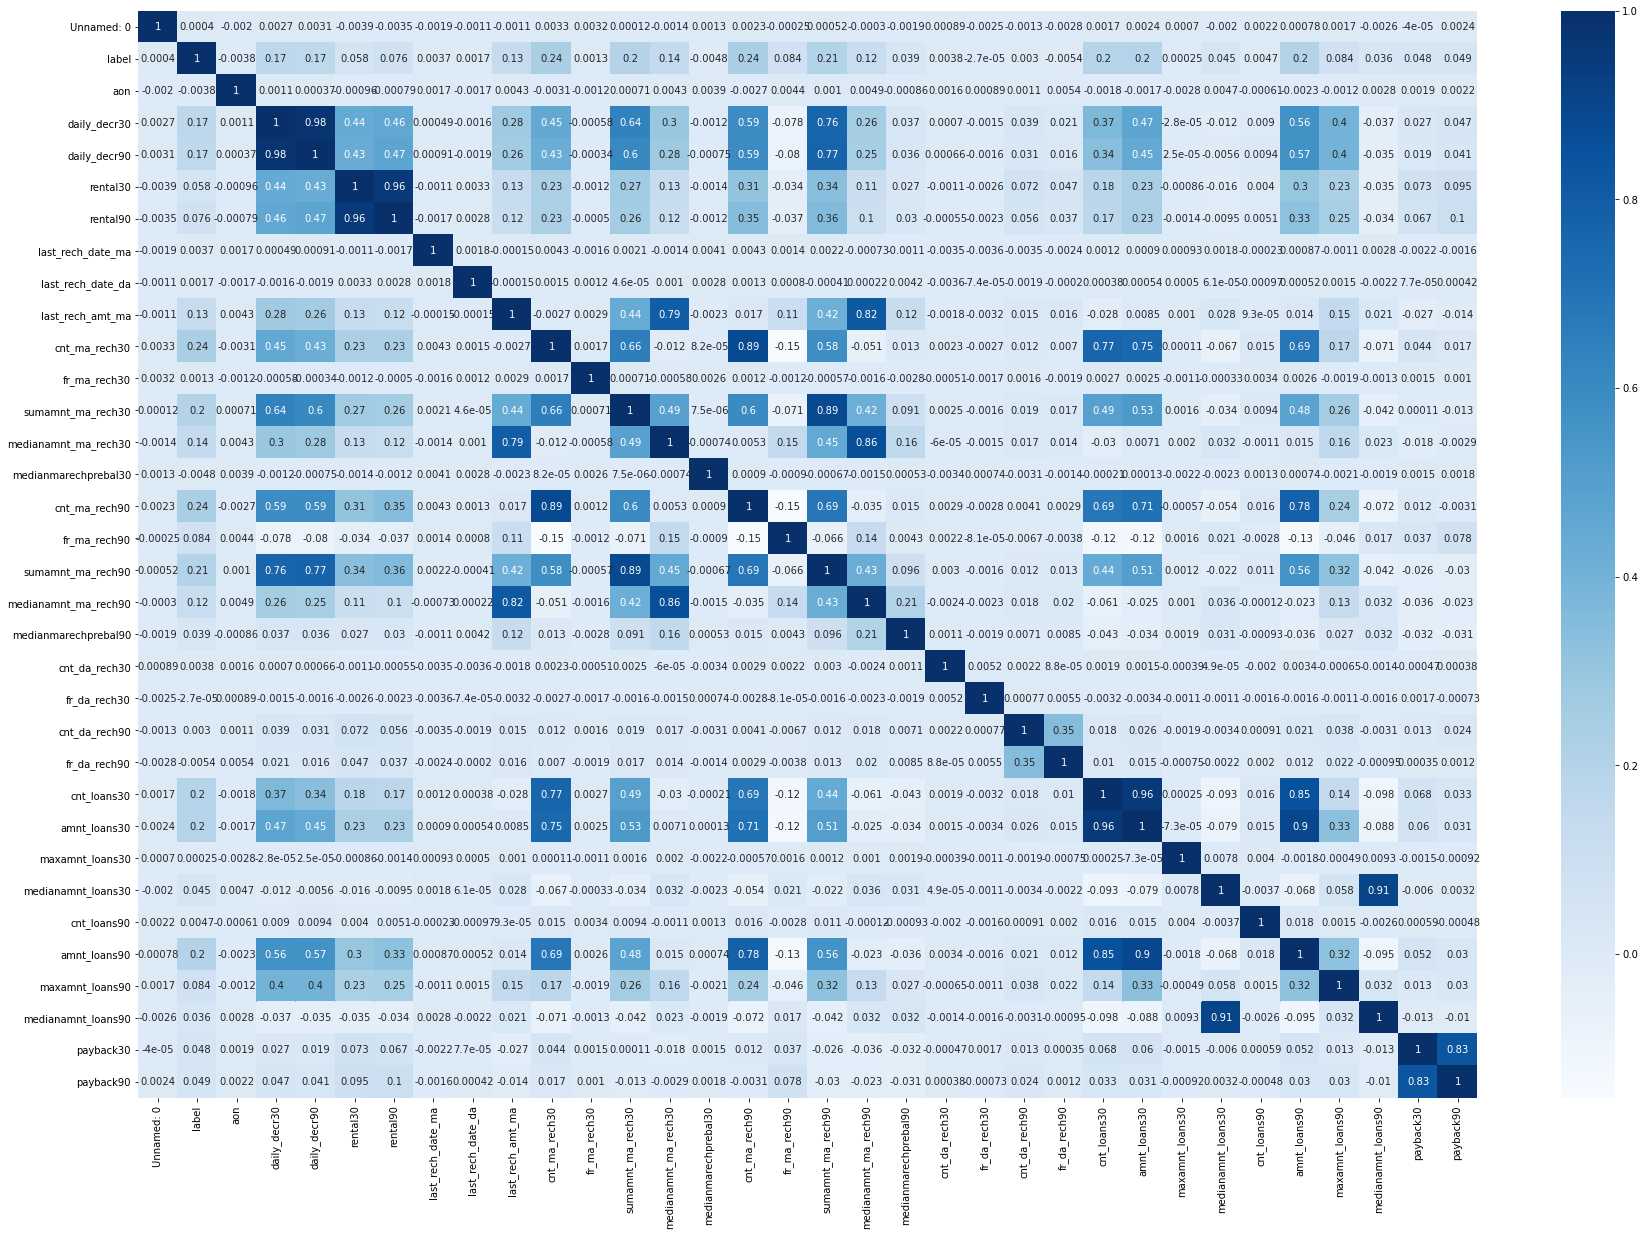

In [11]:
#plotting the heatmap for better underatanding of correlations
plt.figure(figsize=(30,20))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [12]:
#dropping the unammed column
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [13]:
#trasnforming the non numerical data into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['msisdn','pcircle','pdate']
for val in list1:
    df[val]=le.fit_transform(df[val])

# EDA process

In [14]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

1    183431
0     26162
Name: label, dtype: int64

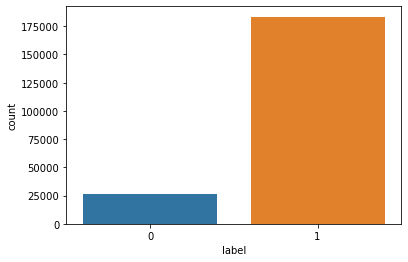

In [15]:
#using the univariate analysis
sns.countplot(x='label', data=df)
df['label'].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000131ED1FAB50>,
      dtype=object)

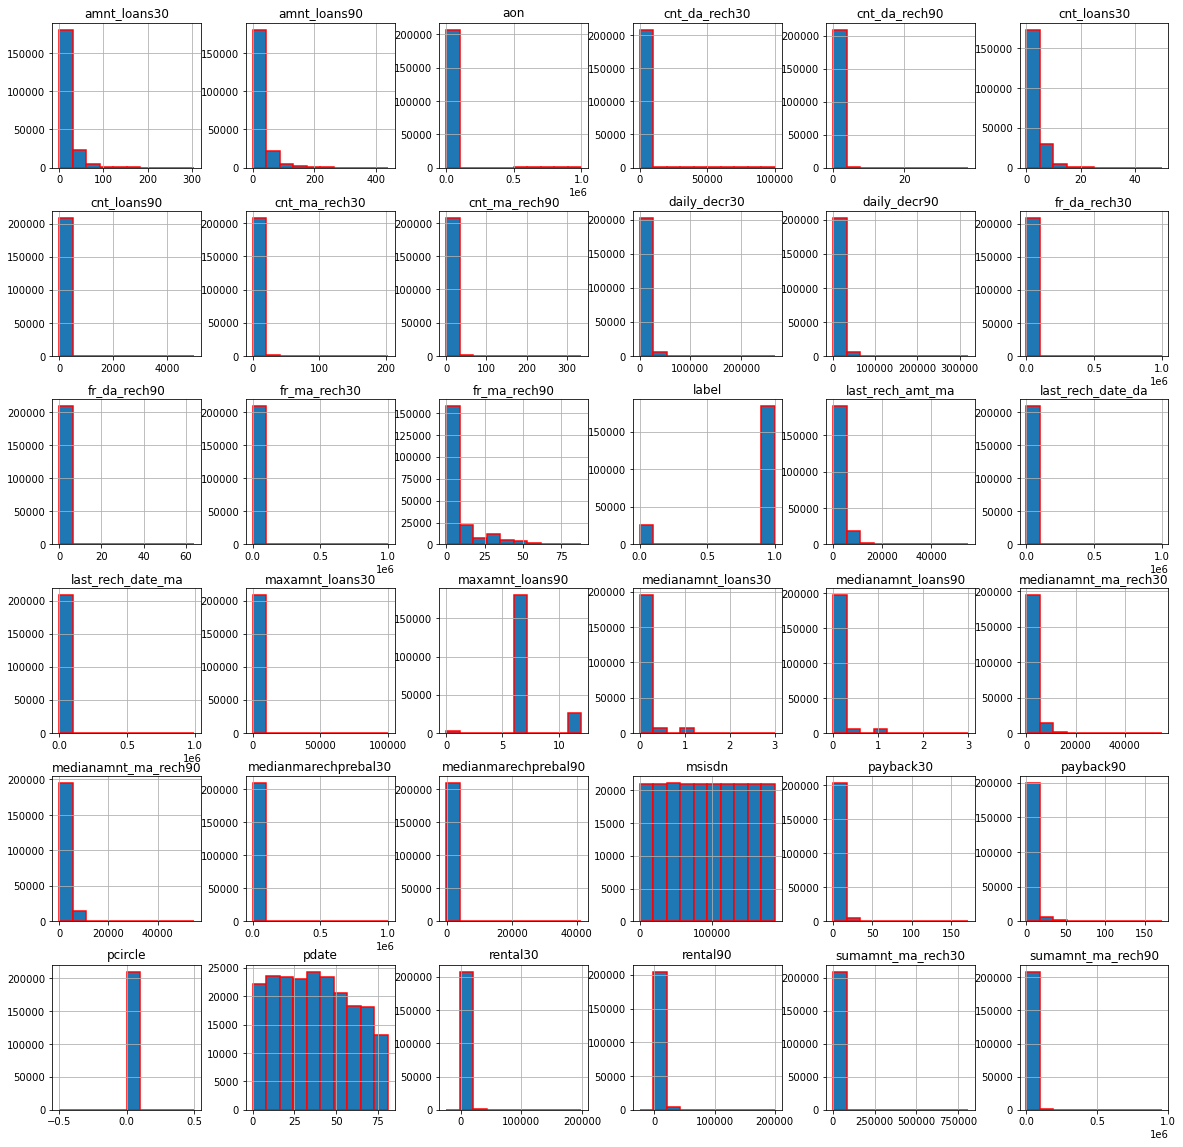

In [16]:
#using hist plot 
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

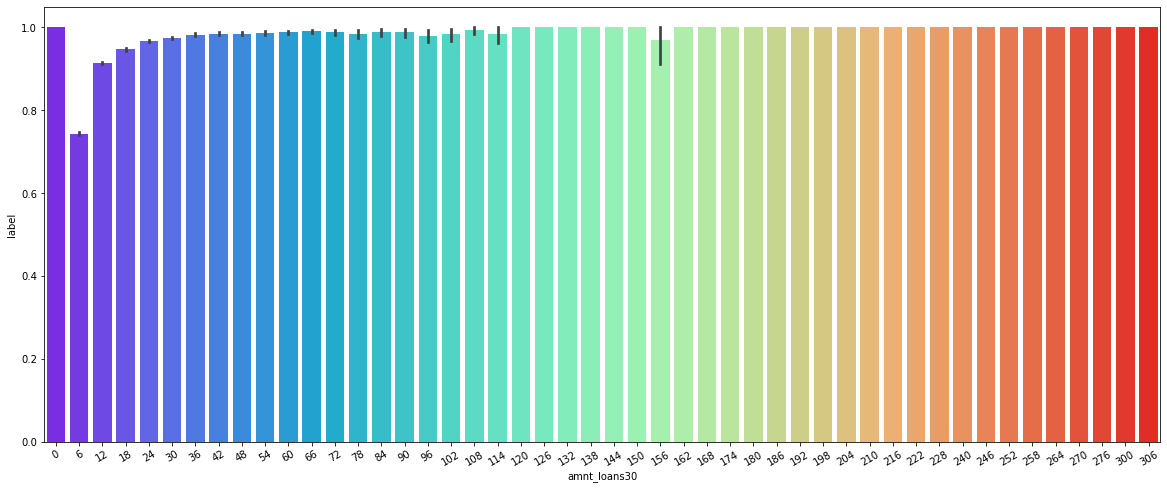

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
144       30
150       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
252        4
228        4
216        4
276        3
222        3
264        3
258        3
204        2
240        2
300        1
270        1
306        1
246        1
Name: amnt_loans30, dtype: int64

In [17]:
#using the bivarate analysis 
plt.figure(figsize=(20,8))
sns.barplot(x='amnt_loans30',y='label',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()
df['amnt_loans30'].value_counts()

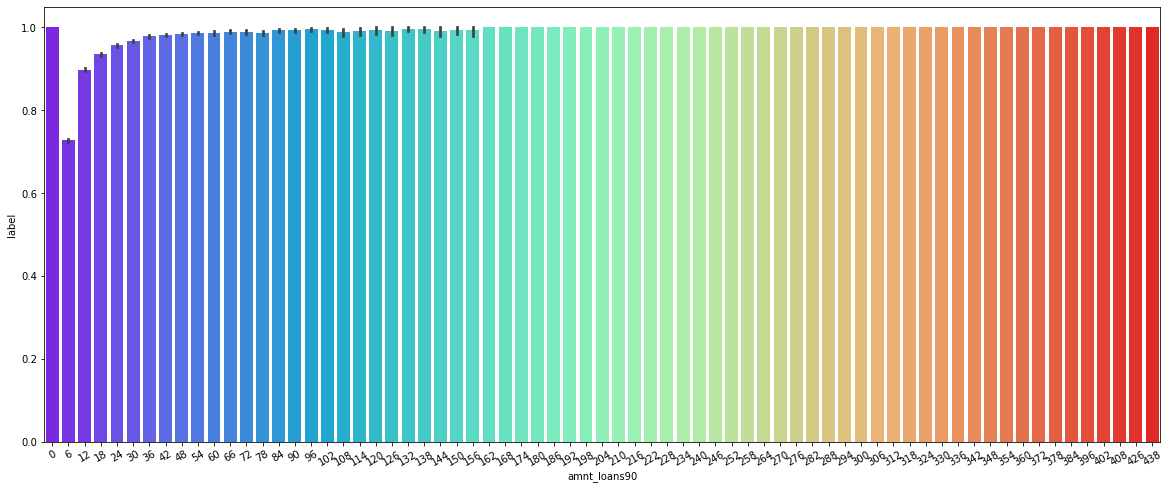

In [18]:
plt.figure(figsize=(20,8))
sns.barplot(x='amnt_loans90',y='label',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

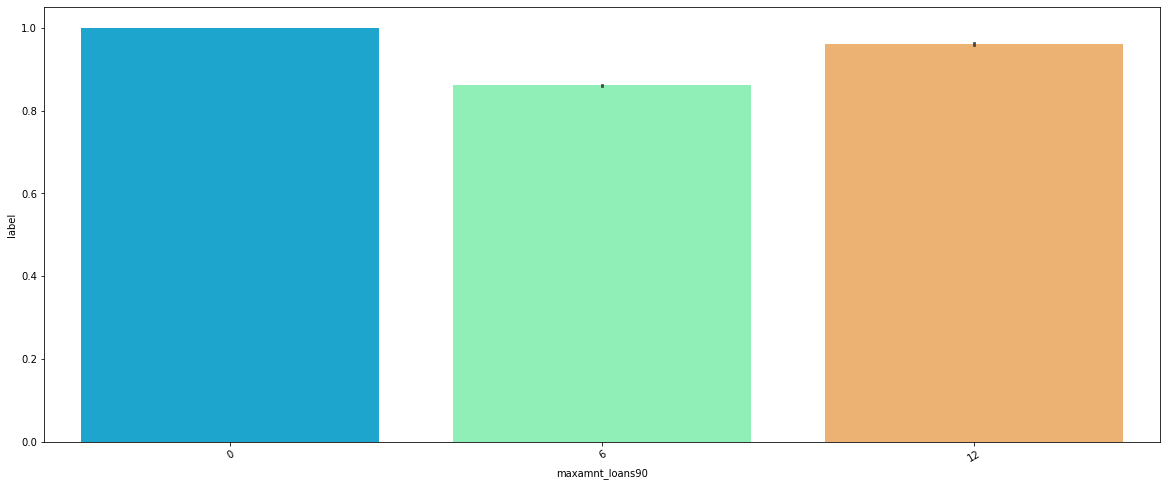

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(x='maxamnt_loans90',y='label',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

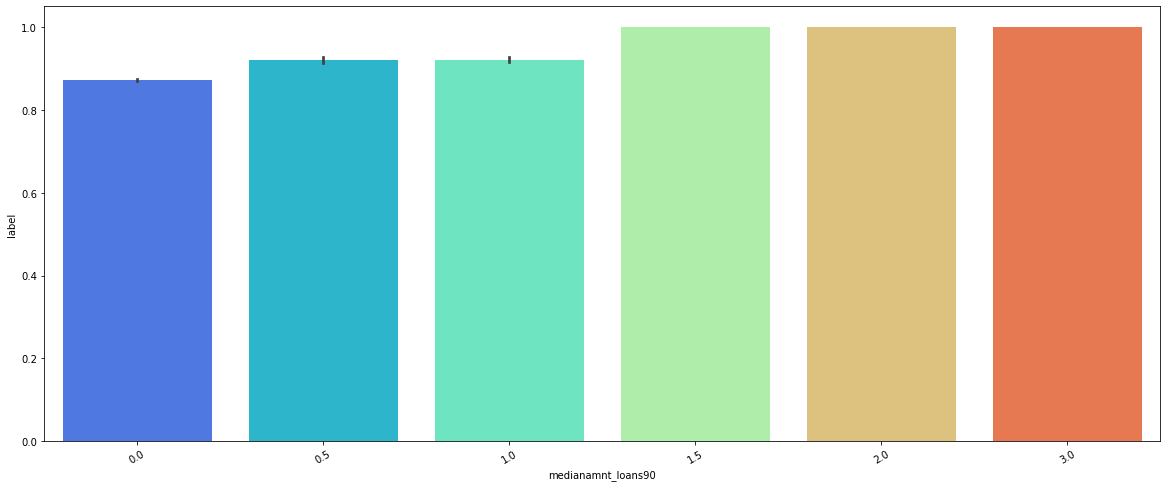

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x='medianamnt_loans90',y='label',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

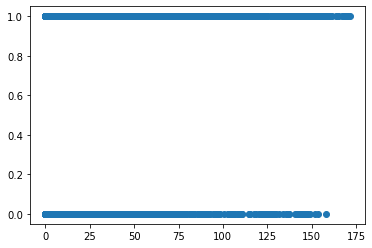

In [21]:
#using scatterplot
plt.scatter(x='payback30', y='label', data=df)
plt.show()

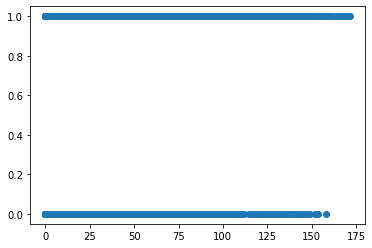

In [22]:
plt.scatter(x='payback90', y='label', data=df)
plt.show()

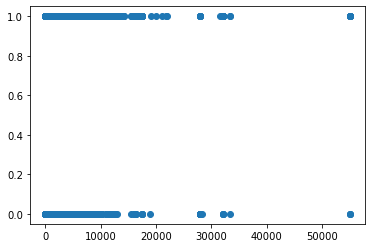

In [23]:
plt.scatter(x='medianamnt_ma_rech30', y='label', data=df)
plt.show()

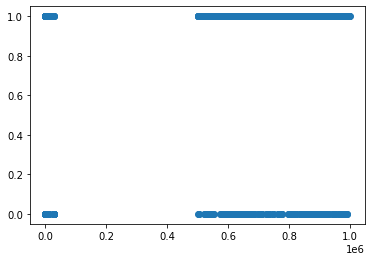

In [24]:
plt.scatter(x='medianmarechprebal30', y='label', data=df)
plt.show()

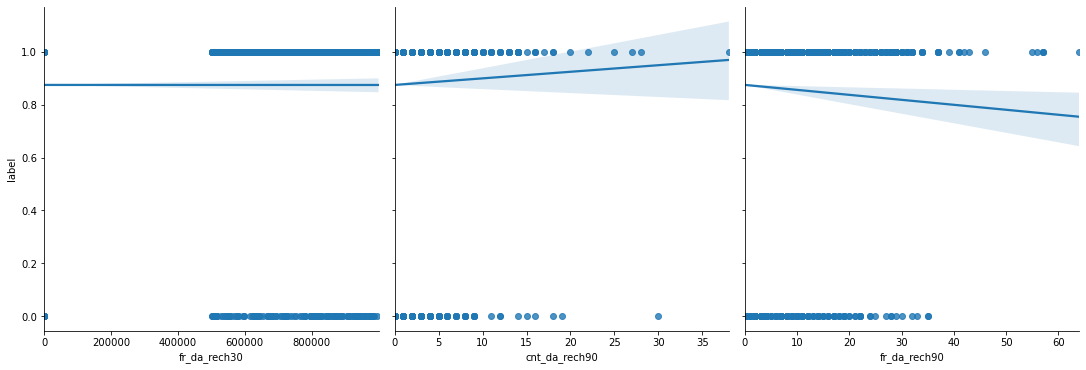

In [25]:
#using pairplot
sns.pairplot(df, x_vars=['fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90'], y_vars='label', size=5, aspect=1, kind='reg')

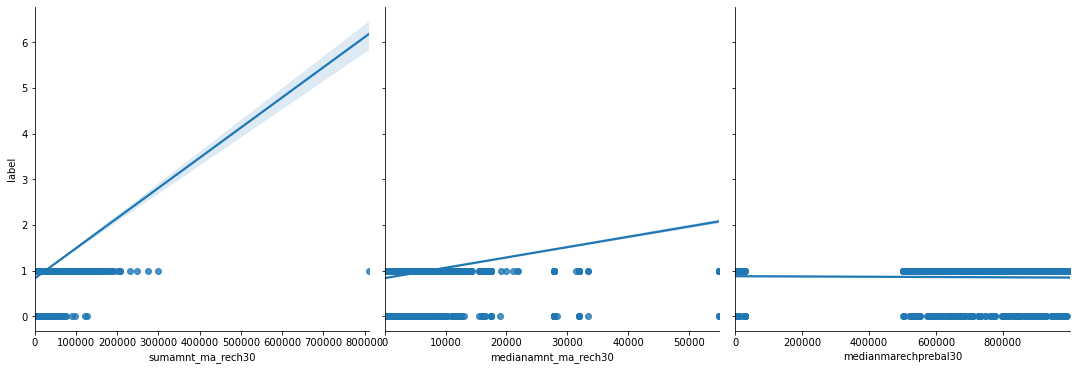

In [26]:
sns.pairplot(df, x_vars=['sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30'], y_vars='label', size=5, aspect=1, kind='reg')

# skewness

In [27]:
df.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

label
-2.2702374722925835


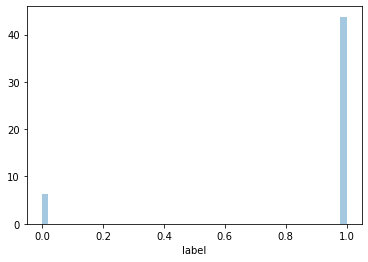

msisdn
0.000718895751350096


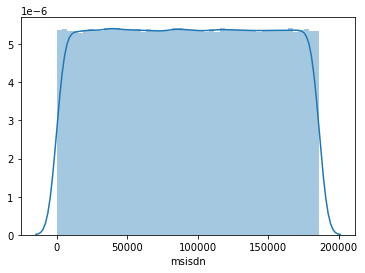

aon
10.392874441936288


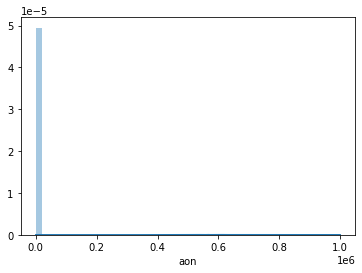

daily_decr30
3.9462019874779264


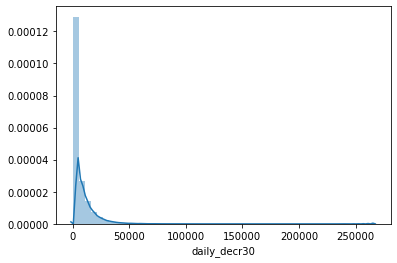

daily_decr90
4.252534591106086


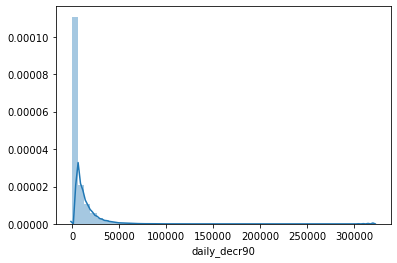

rental30
4.5218966473064315


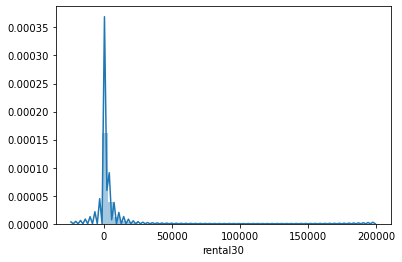

rental90
4.4376487807407266


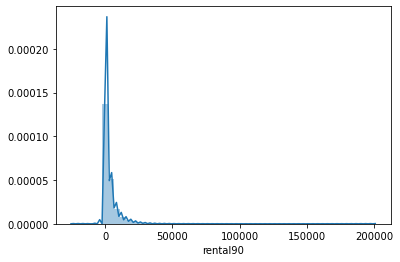

last_rech_date_ma
14.790868005814286


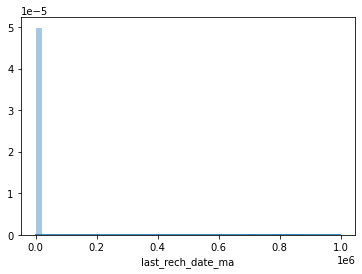

last_rech_date_da
14.814751205382457


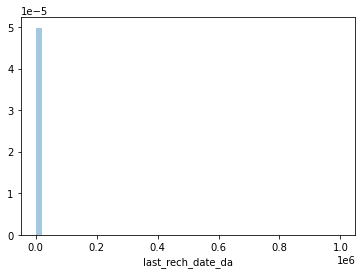

last_rech_amt_ma
3.781121576407043


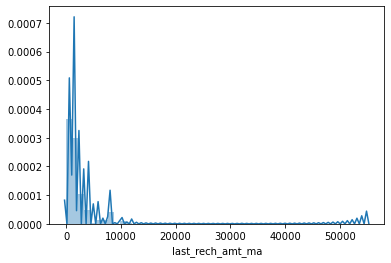

cnt_ma_rech30
3.2838180013879295


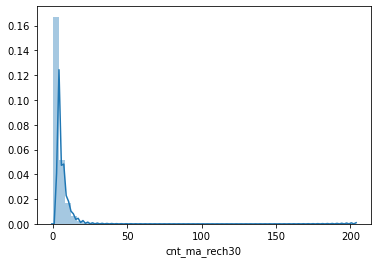

fr_ma_rech30
14.772726911394182


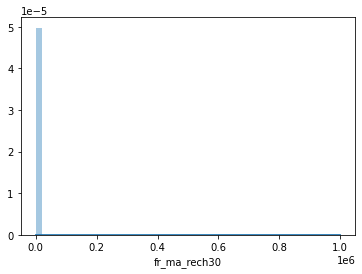

sumamnt_ma_rech30
6.386741340983388


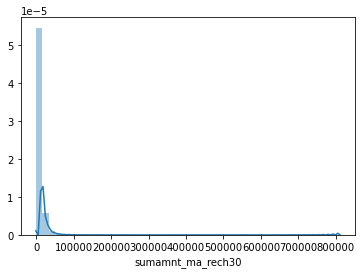

medianamnt_ma_rech30
3.512299013694375


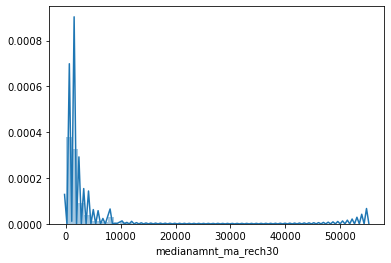

medianmarechprebal30
14.779769568118233


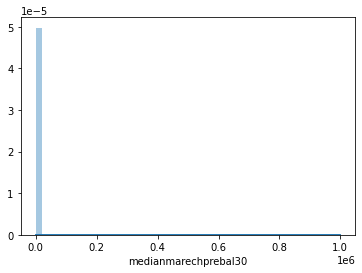

cnt_ma_rech90
3.425229132902297


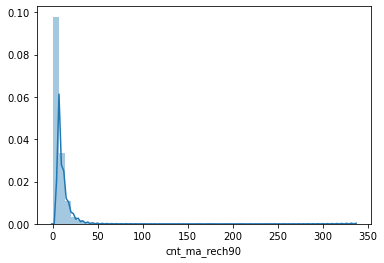

fr_ma_rech90
2.2854064403417964


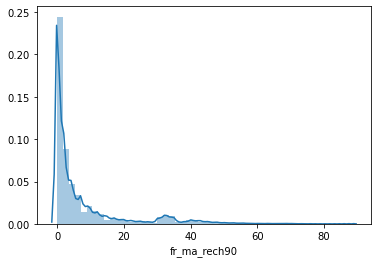

sumamnt_ma_rech90
4.897914558768428


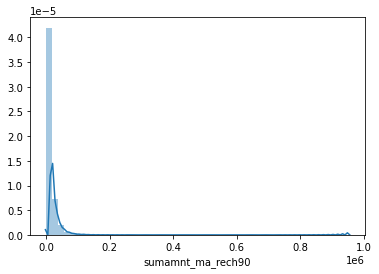

medianamnt_ma_rech90
3.752679166445998


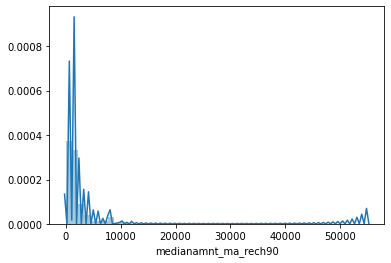

medianmarechprebal90
44.88018204130558


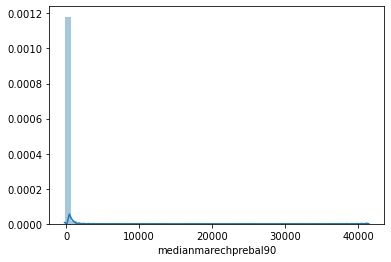

cnt_da_rech30
17.818236613825185


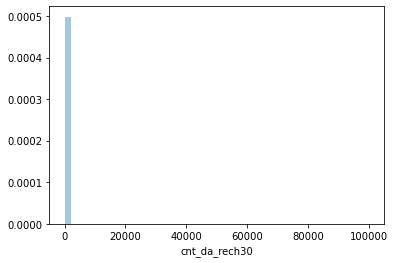

fr_da_rech30
14.776324483257788


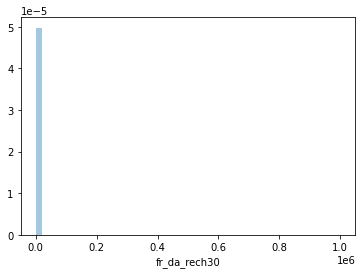

cnt_da_rech90
27.26708253699577


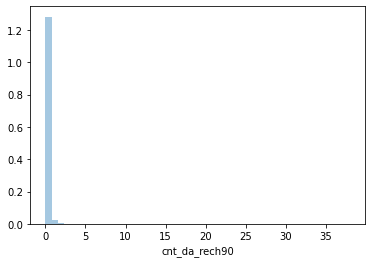

fr_da_rech90
28.987875246755486


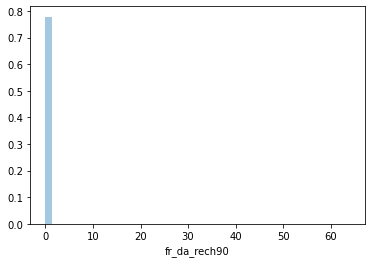

cnt_loans30
2.7134016676460946


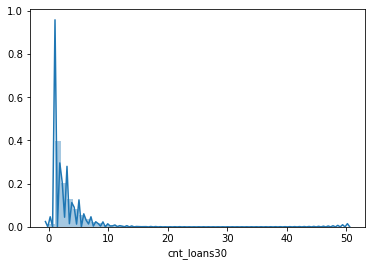

amnt_loans30
2.9756981766272026


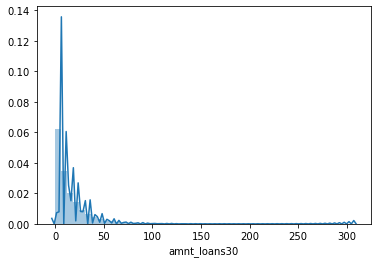

maxamnt_loans30
17.657925277921116


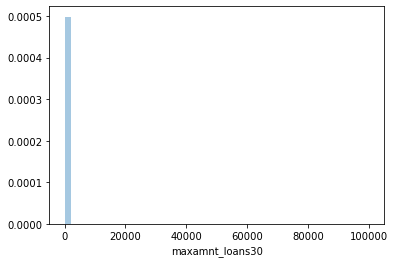

medianamnt_loans30
4.55101044632022


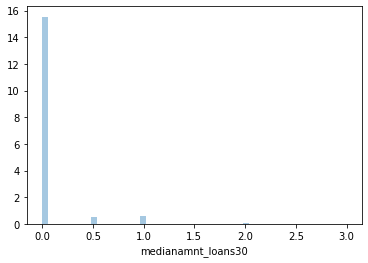

cnt_loans90
16.594289211972995


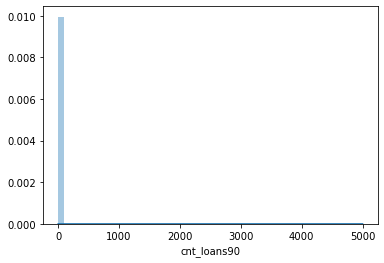

amnt_loans90
3.1499837881606


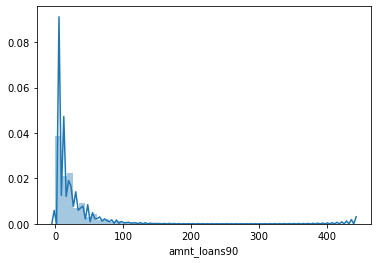

maxamnt_loans90
1.6782917785500069


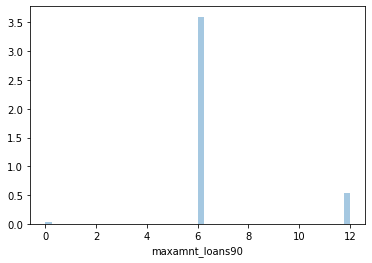

medianamnt_loans90
4.8956852390988965


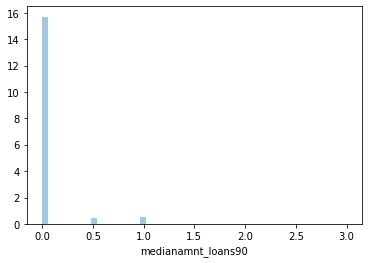

payback30
8.31063517895075


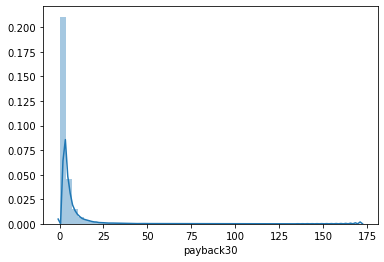

payback90
6.899901431460752


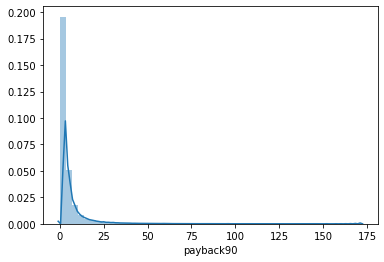

pcircle
0.0


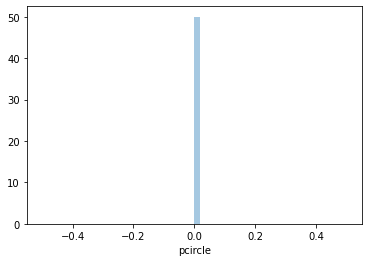

pdate
0.11640804154146515


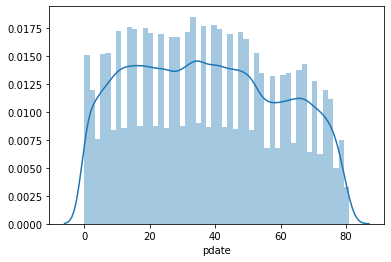

In [28]:
#plotting skewness using for loop
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

# outliers 

In [29]:
#using box plot in for loop for ouliers checking
collist=df.columns.values
ncol=10
nrows=14

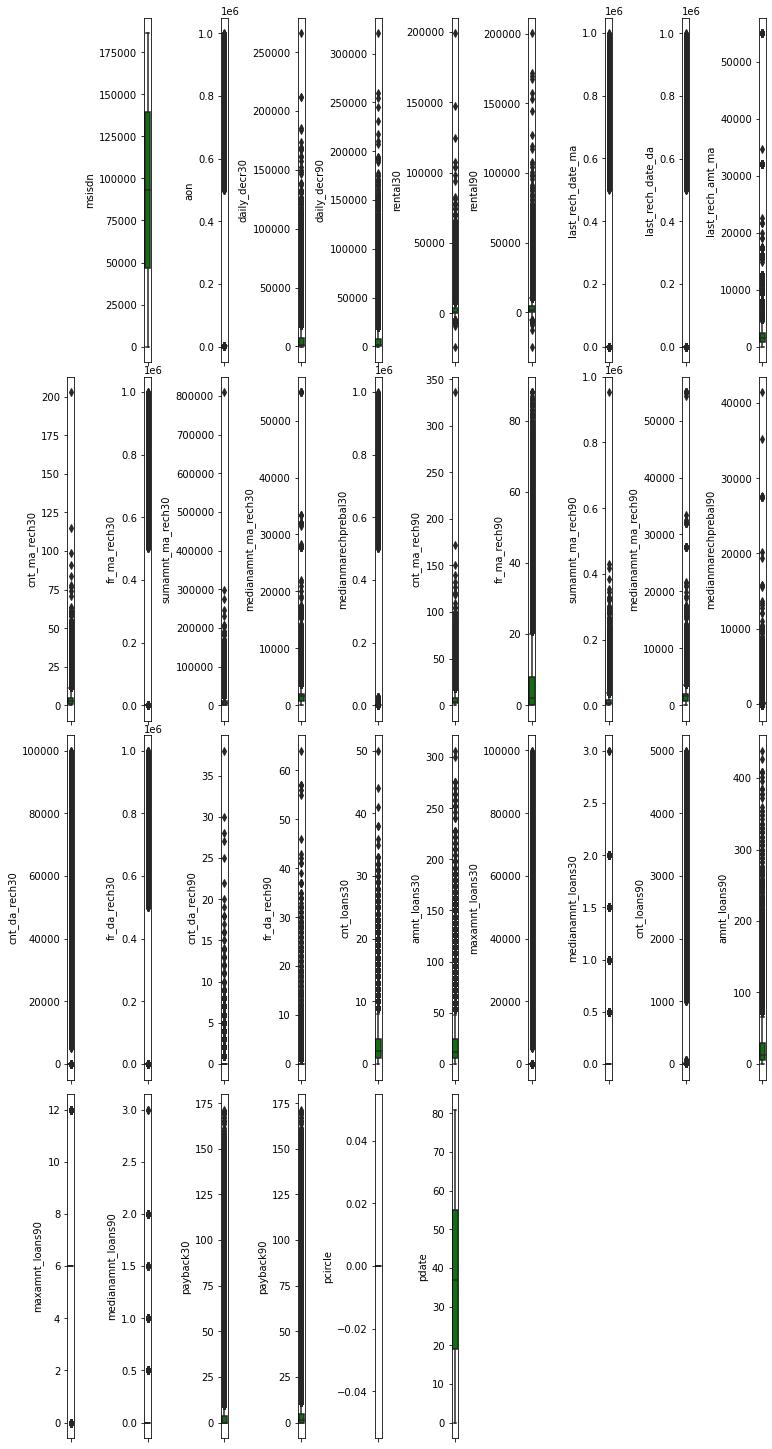

In [30]:
plt.figure(figsize=(ncol,7*ncol))
for i in range(1, len(collist)):
           plt.subplot(nrows,ncol,i+1)
           sns.boxplot(df[collist[i]],color='green',orient='v')
           plt.tight_layout()

# Data cleaning
    

we need to transform those columns which has skewness and outliers

In [31]:
#using IQR method to remove outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR= Q3 - Q1
print(IQR)

label                       0.000
msisdn                  93120.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90  

In [32]:
df_new=df[((df <(Q1 - 1.5 * IQR)) |(df>(Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new.shape)

(152965, 36)


In [33]:
df.shape

(209593, 36)

In [34]:
percentage_loss=((209593-152965)/209593)*100
print(percentage_loss)

27.018077893822788


we are using IQR method sine z score method removes all the data

# splitting the data

In [35]:
#seperating independent and target variable
x=df_new.drop('label', axis=1)
y=df_new['label'] #target variable

In [36]:
x

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,40191,272.0,3055.050000,3065.150,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.000000,0,49
1,142291,712.0,12122.000000,12124.750,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.0,0.000000,0,70
3,104157,241.0,21.228000,21.228,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.0,0.000000,0,5
5,67908,568.0,2257.362667,2261.460,368.13,380.13,2.0,0.0,1539,4,...,6.0,0.0,3.0,18,6,0.0,11.0,8.333333,0,31
6,180459,545.0,2876.641667,2883.970,335.75,402.90,13.0,0.0,5787,1,...,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,112557,254.0,20079.157333,20228.090,4003.12,5173.74,2.0,0.0,1539,9,...,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,0,51
209587,37325,239.0,14678.000000,14704.900,12935.26,16775.60,8.0,0.0,3178,3,...,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,0,62
209590,53995,1013.0,11843.111667,11904.350,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,0,58
209591,111388,1732.0,12488.228333,12574.370,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,0,54


In [37]:
y

0         0
1         1
3         1
5         1
6         1
         ..
209586    1
209587    1
209590    1
209591    1
209592    1
Name: label, Length: 152965, dtype: int64

# Removing skewness by transforming the data

In [38]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# model building

In [39]:
#scaling the dataset using Standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)


In [40]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [41]:
#importing all the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [42]:
#logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8897024214214738
[[ 3343  3214]
 [ 1004 30681]]
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      6557
           1       0.91      0.97      0.94     31685

    accuracy                           0.89     38242
   macro avg       0.84      0.74      0.77     38242
weighted avg       0.88      0.89      0.88     38242



In [43]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7756132001464359
[[ 5070  1487]
 [ 7094 24591]]
              precision    recall  f1-score   support

           0       0.42      0.77      0.54      6557
           1       0.94      0.78      0.85     31685

    accuracy                           0.78     38242
   macro avg       0.68      0.77      0.70     38242
weighted avg       0.85      0.78      0.80     38242



In [44]:
# dicisiontreeclassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8892840332618587
[[ 4494  2063]
 [ 2171 29514]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      6557
           1       0.93      0.93      0.93     31685

    accuracy                           0.89     38242
   macro avg       0.80      0.81      0.81     38242
weighted avg       0.89      0.89      0.89     38242



# ensemble techniques

In [45]:
#randomforestclassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9248208775691648
[[ 4208  2349]
 [  526 31159]]
              precision    recall  f1-score   support

           0       0.89      0.64      0.75      6557
           1       0.93      0.98      0.96     31685

    accuracy                           0.92     38242
   macro avg       0.91      0.81      0.85     38242
weighted avg       0.92      0.92      0.92     38242



In [46]:
#adaboostclassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.916531562156791
[[ 4166  2391]
 [  801 30884]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.72      6557
           1       0.93      0.97      0.95     31685

    accuracy                           0.92     38242
   macro avg       0.88      0.81      0.84     38242
weighted avg       0.91      0.92      0.91     38242



RandomForestClassifier is giving us the accuracy of 92% we will use this model

# Auc-Roc curve

In [50]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [51]:
y_pred_prob=rf.predict_proba(x_test)[:,0]

In [52]:
y_pred_prob

array([0.98, 1.  , 0.15, ..., 0.03, 0.94, 0.03])

In [53]:
tpr,fpr,threshold=roc_curve(y_test,y_pred_prob)


In [54]:
tpr

array([0.        , 0.25423212, 0.29922221, 0.32560622, 0.34451731,
       0.3582431 , 0.37334147, 0.38401708, 0.39393015, 0.40247064,
       0.40933354, 0.41695898, 0.42244929, 0.4296172 , 0.43587006,
       0.44044533, 0.44578313, 0.44990087, 0.45554369, 0.4625591 ,
       0.46682934, 0.47201464, 0.47780997, 0.48208022, 0.48757054,
       0.49306085, 0.49855117, 0.50312643, 0.5078542 , 0.51242946,
       0.51868232, 0.52478268, 0.52935794, 0.53515327, 0.5409486 ,
       0.54628641, 0.55253927, 0.5581821 , 0.56504499, 0.57175538,
       0.57694067, 0.58304102, 0.58898887, 0.59341162, 0.59905445,
       0.60530731, 0.60530731, 0.60957755, 0.61491536, 0.62040567,
       0.62726857, 0.63382645, 0.6417569 , 0.64770474, 0.64770474,
       0.65578771, 0.66234558, 0.66920848, 0.66920848, 0.67439378,
       0.67439378, 0.68018911, 0.68705201, 0.69345737, 0.7009303 ,
       0.70596309, 0.70596309, 0.71343602, 0.71938386, 0.7270093 ,
       0.73326216, 0.74119262, 0.74912307, 0.75613848, 0.76498

In [55]:
fpr

array([0.00000000e+00, 0.00000000e+00, 3.15606754e-05, 6.31213508e-05,
       6.31213508e-05, 9.46820262e-05, 9.46820262e-05, 1.26242702e-04,
       1.57803377e-04, 1.89364052e-04, 2.52485403e-04, 2.84046079e-04,
       3.15606754e-04, 4.73410131e-04, 5.68092157e-04, 6.62774183e-04,
       8.20577560e-04, 8.83698911e-04, 1.04150229e-03, 1.23086634e-03,
       1.35710904e-03, 1.42023039e-03, 1.67271580e-03, 2.11456525e-03,
       2.30392930e-03, 2.65109673e-03, 2.80890011e-03, 3.12450686e-03,
       3.37699227e-03, 3.59791700e-03, 3.88196307e-03, 4.13444848e-03,
       4.51317658e-03, 4.82878334e-03, 5.20751144e-03, 5.71248225e-03,
       5.87028562e-03, 6.34369576e-03, 6.78554521e-03, 7.32207669e-03,
       8.14265425e-03, 8.74230709e-03, 9.21571722e-03, 1.00047341e-02,
       1.09199937e-02, 1.16774499e-02, 1.17090106e-02, 1.22771027e-02,
       1.30976803e-02, 1.40445006e-02, 1.47703961e-02, 1.55278523e-02,
       1.66009153e-02, 1.74530535e-02, 1.74846142e-02, 1.87470412e-02,
      

In [56]:
threshold

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.94      , 0.93      , 0.92      ,
       0.91      , 0.9       , 0.89      , 0.88      , 0.87      ,
       0.86      , 0.85      , 0.84      , 0.83      , 0.82      ,
       0.81      , 0.8       , 0.79      , 0.78      , 0.77      ,
       0.76      , 0.75      , 0.74      , 0.73      , 0.72      ,
       0.71      , 0.7       , 0.69      , 0.68      , 0.67      ,
       0.66      , 0.65      , 0.64      , 0.63      , 0.62      ,
       0.61      , 0.6       , 0.59      , 0.58      , 0.57      ,
       0.56      , 0.55166667, 0.55      , 0.54      , 0.53      ,
       0.52      , 0.51      , 0.5       , 0.49      , 0.485     ,
       0.48      , 0.47      , 0.46      , 0.455     , 0.45      ,
       0.44333333, 0.44      , 0.43      , 0.42      , 0.41      ,
       0.4       , 0.395     , 0.39      , 0.38      , 0.37      ,
       0.36      , 0.35      , 0.34      , 0.33      , 0.32   

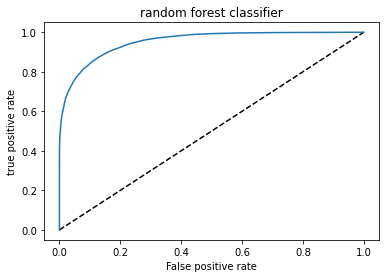

In [57]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random forest classifier')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('random forest classifier')
plt.show()

In [58]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [59]:
auc_score

0.8125779928811111